In [1]:
import pandas as pd
from nilearn import image
from nilearn.glm.first_level import make_first_level_design_matrix, FirstLevelModel
from nilearn.plotting import plot_stat_map
import numpy as np
import matplotlib.pyplot as plt
from nilearn import plotting




(59, 73, 63)


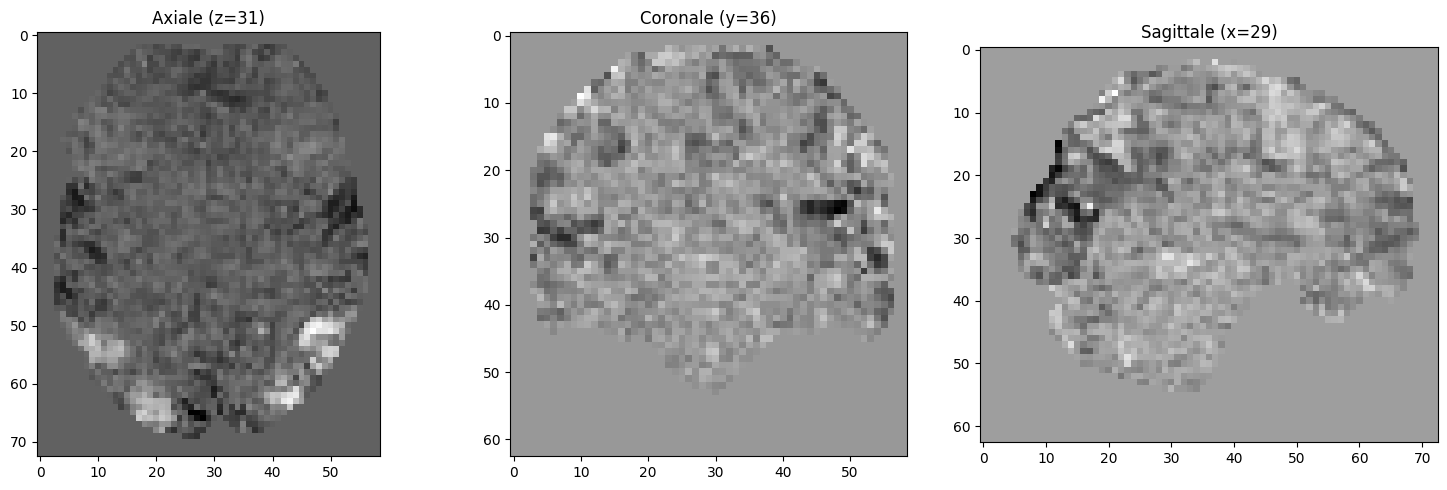

In [2]:
import nibabel as nib

# Charger le fichier
img = nib.load(r'C:\Users\Rémi\Desktop\australie\codes\Lucas\Results\sub-06\sub-06_Risk-control_z-map.nii.gz')

# Obtenir les données sous forme de tableau numpy
data = img.get_fdata()

# Afficher la forme
print(data.shape)

# Choisir un point central pour les coupes
x = data.shape[0] // 2
y = data.shape[1] // 2
z = data.shape[2] // 2

# Affichage
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Coupe axiale (vue du haut)
axes[0].imshow(np.rot90(data[:, :, z]), cmap="gray")
axes[0].set_title(f'Axiale (z={z})')

# Coupe coronale (vue de face)
axes[1].imshow(np.rot90(data[:, y, :]), cmap="gray")
axes[1].set_title(f'Coronale (y={y})')

# Coupe sagittale (vue de côté)
axes[2].imshow(np.rot90(data[x, :, :]), cmap="gray")
axes[2].set_title(f'Sagittale (x={x})')

plt.tight_layout()
plt.show()


In [3]:
# Path to the files
img_paths = [r'BOLD_DATA\BIDS\sub-03\func\files_AP_MB4_BOLD_Risk2_20230814084543_13.nii.gz', r'BOLD_DATA\BIDS\sub-03\func\files_AP_MB4_BOLD_Risk1_20230814084543_11.nii.gz']
confound_paths = ['BOLD_DATA\BIDS\sub-03\func\files_AP_MB4_BOLD_Risk1_20230814084543_11.json', 'C:/Users/hennecol/Documents/FMRI experiment/FINAL FOLDER/BOLD_DATA/BIDS/derivatives/sub-03/func/sub-03_task-carrsq_run-2_desc-confounds_timeseries.tsv']
event_paths = ['C:/Users/hennecol/Documents/FMRI experiment/FINAL FOLDER/BOLD_DATA/BIDS/sub-03/func/sub-03_task-carrsq_run-1_events.tsv', 'C:/Users/hennecol/Documents/FMRI experiment/FINAL FOLDER/BOLD_DATA/BIDS/sub-03/func/sub-03_task-carrsq_run-2_events.tsv']

<>:3: SyntaxWarning: invalid escape sequence '\B'
<>:3: SyntaxWarning: invalid escape sequence '\B'
C:\Users\Rémi\AppData\Local\Temp\ipykernel_25744\624494519.py:3: SyntaxWarning: invalid escape sequence '\B'
  confound_paths = ['BOLD_DATA\BIDS\sub-03\func\files_AP_MB4_BOLD_Risk1_20230814084543_11.json', 'C:/Users/hennecol/Documents/FMRI experiment/FINAL FOLDER/BOLD_DATA/BIDS/derivatives/sub-03/func/sub-03_task-carrsq_run-2_desc-confounds_timeseries.tsv']


In [3]:
%matplotlib notebook

In [6]:
%matplotlib inline

In [7]:
from nilearn.glm.first_level import FirstLevelModel, make_first_level_design_matrix
from nilearn.plotting import plot_stat_map
import pandas as pd
import numpy as np
import pandas as pd
from nilearn import image
import matplotlib.pyplot as plt
from nilearn import plotting

plt.close('all')

# Exemple de paramètres
tr = 1.0  # Temps de répétition en secondes
n_scans = 800  # Nombre de scans dans votre run
frame_times = np.arange(n_scans) * tr

# Charger les données d'événements
# Remplacer 'chemin/vers/fichier_evenements.tsv' par le chemin réel vers votre fichier d'événements
# events = pd.read_csv('C:/Users/hennecol/Documents/FMRI experiment/FINAL FOLDER/BOLD_DATA/BIDS/sub-03/func/sub-03_task-carrsq_run-1_events.tsv', sep='\t')
events = pd.read_csv(r"C:\Users\Rémi\Desktop\australie\codes\Lucas\BOLD_DATA\BIDS\sub-03\func\task-Risk1_events.tsv", sep='\t')
# Créer la matrice de design
design_matrix = make_first_level_design_matrix(frame_times, events,
                                               hrf_model='spm',
                                               drift_model='polynomial',
                                               high_pass=.01,
                                               drift_order=3)
print(design_matrix.columns)
# Charger les données fMRI prétraitées
# Remplacer 'chemin/vers/donnees_fMRI.nii.gz' par le chemin réel vers vos données fMRI prétraitées
# fmri_img = 'C:/Users/hennecol/Documents/FMRI experiment/FINAL FOLDER/BOLD_DATA/BIDS/derivatives/sub-03/func/sub-03_task-carrsq_run-1_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz'
fmri_img = r"C:\Users\Rémi\Desktop\australie\codes\Lucas\BOLD_DATA\BIDS\sub-03\func\files_AP_MB4_BOLD_Risk1_20230814084543_11.nii.gz"

# Initialiser le modèle GLM
glm = FirstLevelModel(t_r=tr, slice_time_ref=0.5, hrf_model='spm',
                      drift_model='cosine', high_pass=.01, smoothing_fwhm=5.0)

# Ajuster le modèle GLM aux données fMRI en utilisant la matrice de design
glm = glm.fit(fmri_img, design_matrices=design_matrix)

# Définir un contraste
# Ici, vous devez remplacer 'condition1' et 'condition2' par les noms réels des conditions dans votre étude
contrast_def = np.zeros(len(design_matrix.columns))
#contrast_def[design_matrix.columns.get_loc('NonRisk')] = 1
contrast_def[design_matrix.columns.get_loc('constant')] = 1
contrast_def[design_matrix.columns.get_loc('risk')] = -1

# Calculer la carte Z pour le contraste défini
z_map = glm.compute_contrast(contrast_def, output_type='z_score')

# Visualiser la carte Z
plotting.plot_stat_map(z_map, threshold=3.1, display_mode='z', cut_coords=[0, 0, 0], title='Contraste NonRisk vs Risk')

plt.show()

c:\Users\Rémi\AppData\Local\Programs\Python\Python312\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:177: UserWarning: The following unexpected columns in events data will be ignored: nb_images
  warnings.warn(


Index(['neutral', 'risk', 'drift_1', 'drift_2', 'drift_3', 'constant'], dtype='object')


KeyError: <Axes: >

<Figure size 730x320 with 5 Axes>

[_add_readme_to_default_data_locations] Added README.md to C:\Users\Rémi\nilearn_data
[get_dataset_dir] Dataset created in C:\Users\Rémi\nilearn_data\neurovault


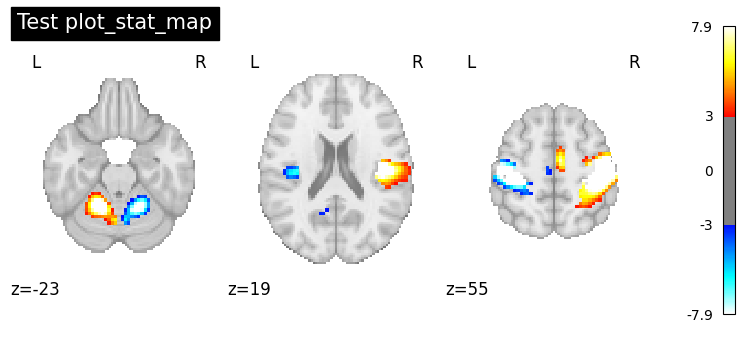

In [1]:
from nilearn import datasets, plotting
import matplotlib.pyplot as plt

# Charger un exemple de données de carte statistique fourni par Nilearn
motor_images = datasets.fetch_neurovault_motor_task()
stat_img = motor_images.images[0]  # Prendre la première image statistique

# Utiliser plot_stat_map pour afficher la carte
plotting.plot_stat_map(stat_img, threshold=3,
                       title="Test plot_stat_map",
                       display_mode='z', cut_coords=3)

plt.show()